# Training Baseline Results with YOLO

## Load Results


In [1]:


import pandas as pd
from google.colab import drive

drive.mount('/content/gdrive')
file_path = 'gdrive/My Drive/MLDM - Deep Learning/CRYOET PROJECT - DEEP LEARNING/2D APPROACH/3 - TRAINING CODE/MODELS/results.csv'
data = pd.read_csv(file_path)


Mounted at /content/gdrive


In [2]:
data.head()

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,174.651,2.22367,2.75471,1.60002,0.40559,0.01200,0.00226,0.00120,2.39854,5.30900,1.45083,0.090315,0.000029,0.000029
1,2,191.180,1.33139,1.38094,1.09330,0.42341,0.41248,0.36876,0.15164,2.01682,2.30870,1.27459,0.080345,0.000059,0.000059
2,3,207.183,1.27157,1.26012,1.06577,0.53059,0.51331,0.50089,0.18863,2.57604,1.65438,1.54242,0.070375,0.000089,0.000089
3,4,223.071,1.24144,1.22671,1.05335,0.54385,0.56416,0.54797,0.31957,1.60960,1.43462,1.08106,0.060405,0.000119,0.000119
4,5,238.919,1.20378,1.19868,1.04201,0.50512,0.58575,0.57569,0.32318,1.70674,1.43704,1.11000,0.050434,0.000149,0.000149


In [3]:
# prompt: summ train/box_loss 	train/cls_loss 	train/dfl_loss in one "total_train_loss" and val/box_loss 	val/cls_loss 	val/dfl_loss in one total_val_loss

data['total_train_loss'] = (data['train/box_loss'] + data['train/cls_loss'] + data['train/dfl_loss']) * 0.5
data['total_val_loss'] = (data['val/box_loss'] + data['val/cls_loss'] + data['val/dfl_loss']) * 0.5

## Individual Losses

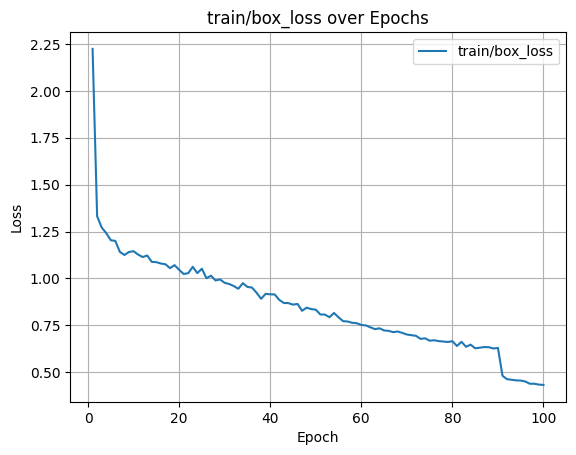

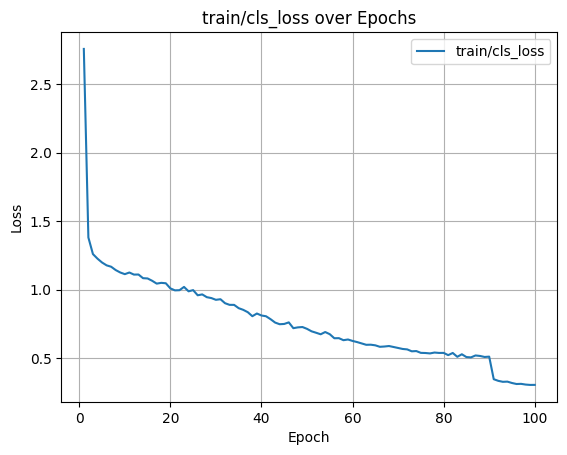

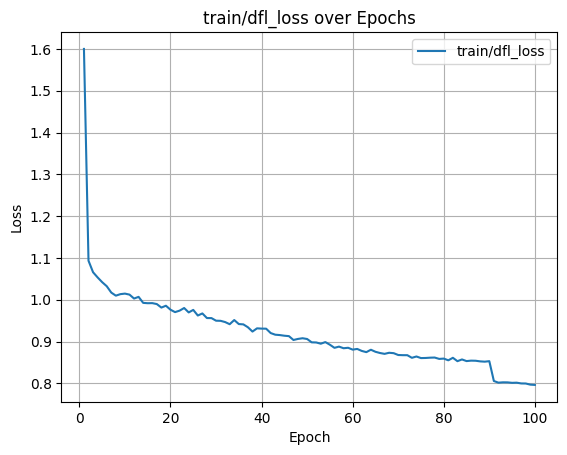

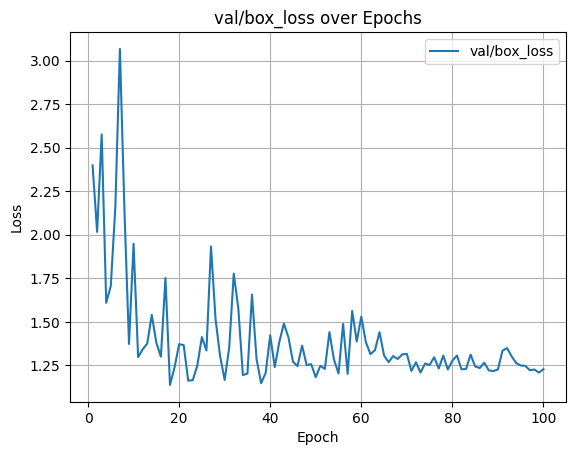

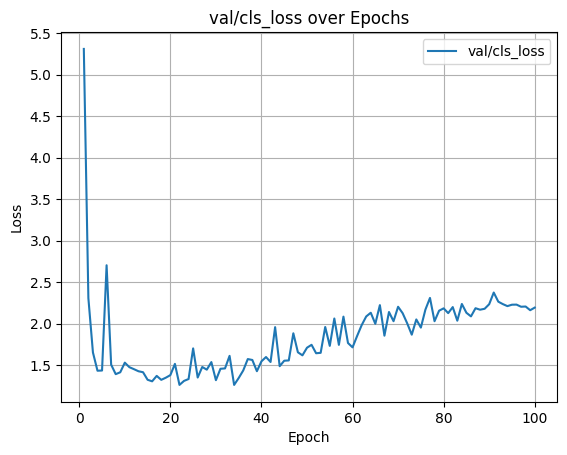

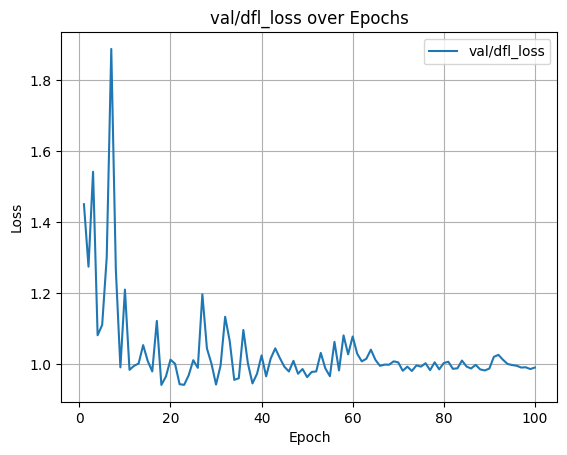

In [4]:
import matplotlib.pyplot as plt

# Extract relevant columns
epochs = data['epoch']
losses = ['train/box_loss', 'train/cls_loss', 'train/dfl_loss', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss']
metrics = ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']

# Plot each individual loss
for loss in losses:
    plt.figure()
    plt.plot(epochs, data[loss], label=loss)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'{loss} over Epochs')
    plt.legend()
    plt.grid()
    plt.show()

## Plot each individual metric

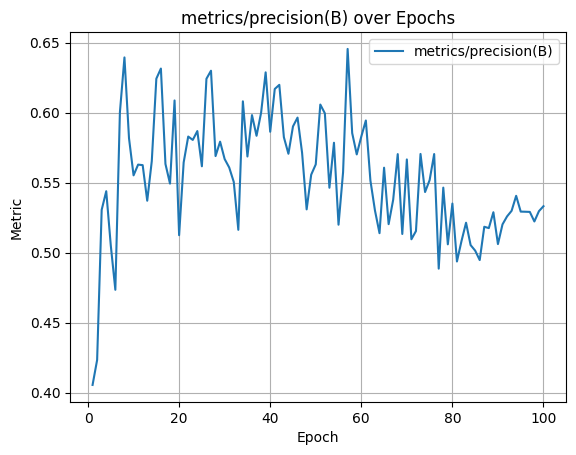

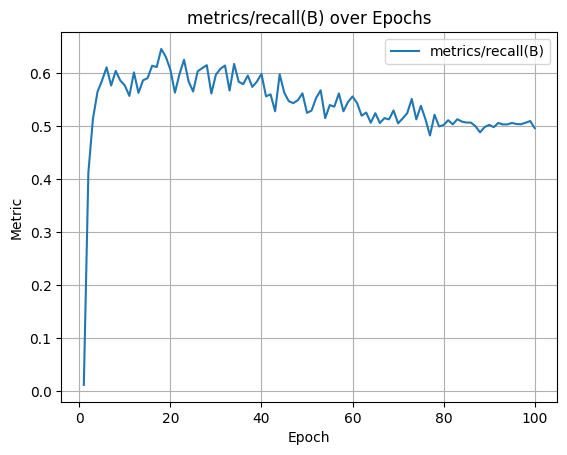

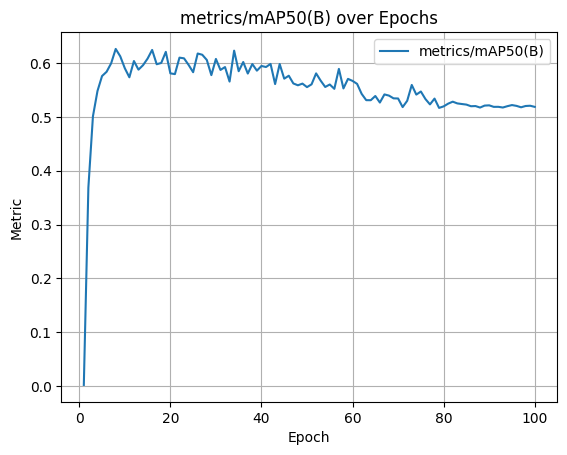

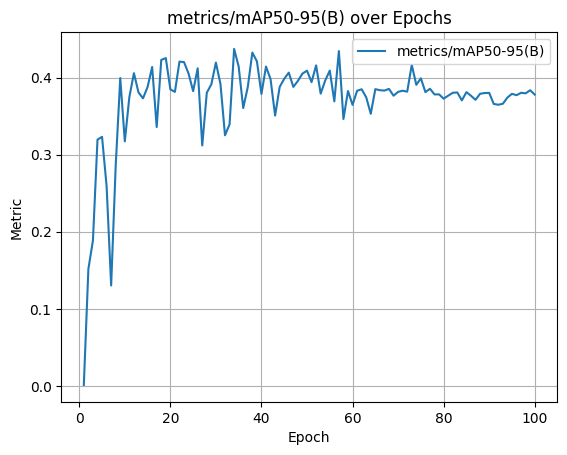

In [5]:

for metric in metrics:
    plt.figure()
    plt.plot(epochs, data[metric], label=metric)
    plt.xlabel('Epoch')
    plt.ylabel('Metric')
    plt.title(f'{metric} over Epochs')
    plt.legend()
    plt.grid()
    plt.show()

## Plot all losses combined

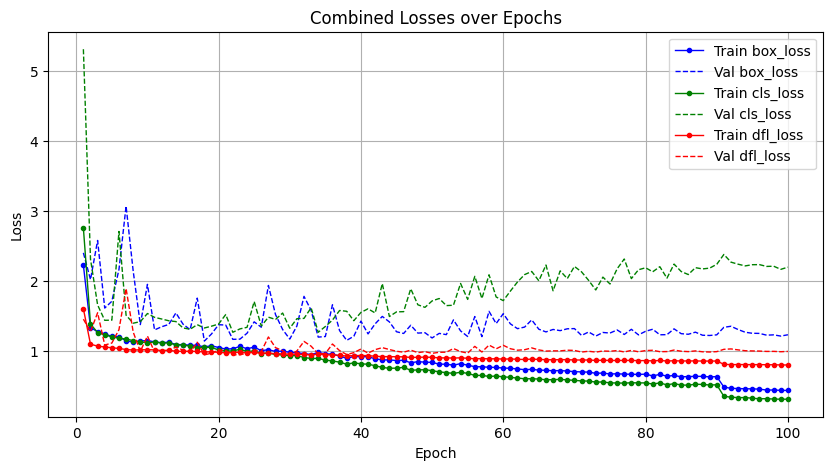

In [6]:
# prompt: plot losses combined. but the columns that share the name like box)loss should be the sane color

import matplotlib.pyplot as plt

# Define a color map for consistent coloring of losses with the same name
color_map = {
    'box_loss': 'blue',
    'cls_loss': 'green',
    'dfl_loss': 'red'
}

plt.figure(figsize=(10, 5))  # Adjust figure size for better readability

for loss_type in ['box_loss', 'cls_loss', 'dfl_loss']:
    plt.plot(epochs, data[f'train/{loss_type}'], label=f'Train {loss_type}', color=color_map[loss_type], marker='.', linewidth=1)
    plt.plot(epochs, data[f'val/{loss_type}'], label=f'Val {loss_type}', linestyle='--', color=color_map[loss_type],  linewidth=1)


plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Combined Losses over Epochs')
plt.legend()
plt.grid(True)
plt.show()

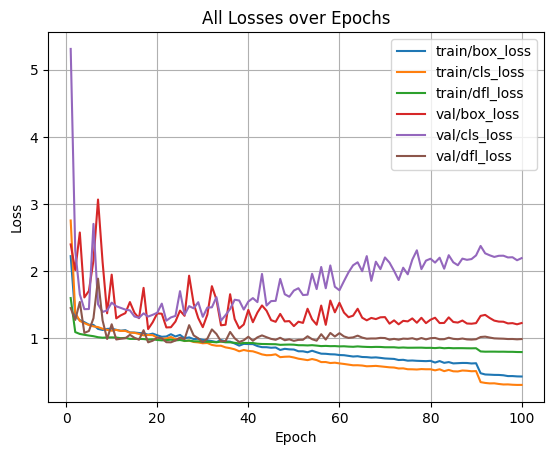

In [7]:

plt.figure()
for loss in losses:
    plt.plot(epochs, data[loss], label=loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('All Losses over Epochs')
plt.legend()
plt.grid()
plt.show()

###Plot of BoxLoss

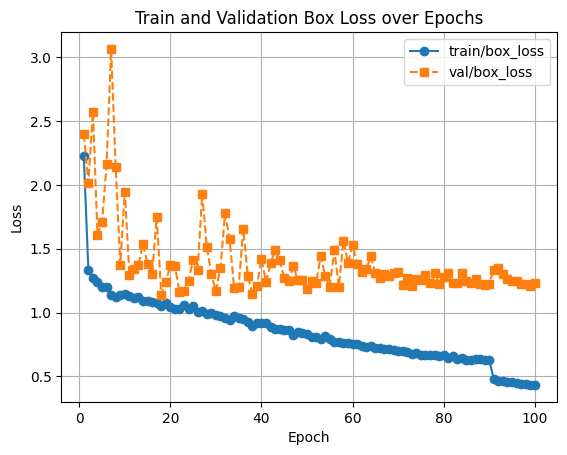

In [8]:
plt.figure()
plt.plot(data['epoch'], data['train/box_loss'], label='train/box_loss', linestyle='-', marker='o')
plt.plot(data['epoch'], data['val/box_loss'], label='val/box_loss', linestyle='--', marker='s')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Validation Box Loss over Epochs')
plt.legend()
plt.grid()
plt.show()

###Plot of ClsLoss

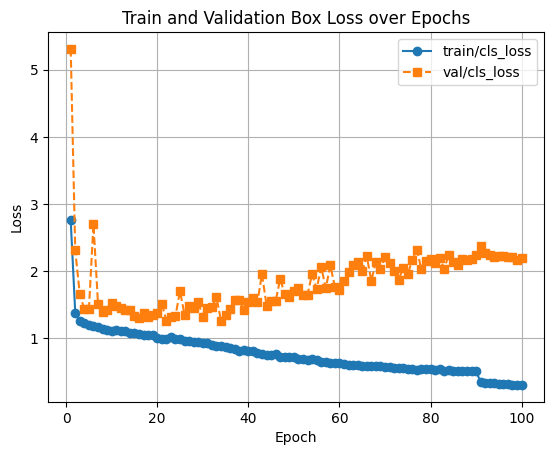

In [9]:
plt.figure()
plt.plot(data['epoch'], data['train/cls_loss'], label='train/cls_loss', linestyle='-', marker='o')
plt.plot(data['epoch'], data['val/cls_loss'], label='val/cls_loss', linestyle='--', marker='s')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Validation Box Loss over Epochs')
plt.legend()
plt.grid()
plt.show()

## Plot all metrics combined

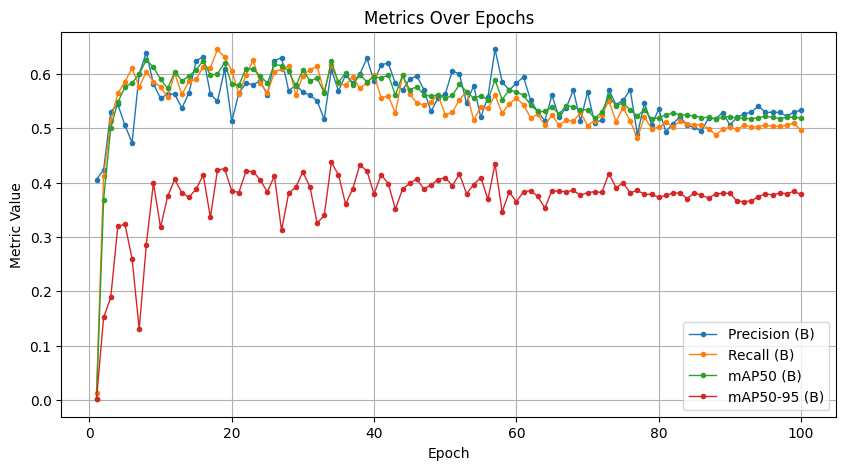

In [10]:
# Create a larger horizontally oriented plot
plt.figure(figsize=(10, 5))  # Set the figure size
metrics_columns = ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
metric_labels = ['Precision (B)', 'Recall (B)', 'mAP50 (B)', 'mAP50-95 (B)']

for metric, label in zip(metrics_columns, metric_labels):
    plt.plot(data['epoch'], data[metric], label=label, marker='.', linewidth=1)

plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.title('Metrics Over Epochs')
plt.legend()
plt.grid()
plt.show()

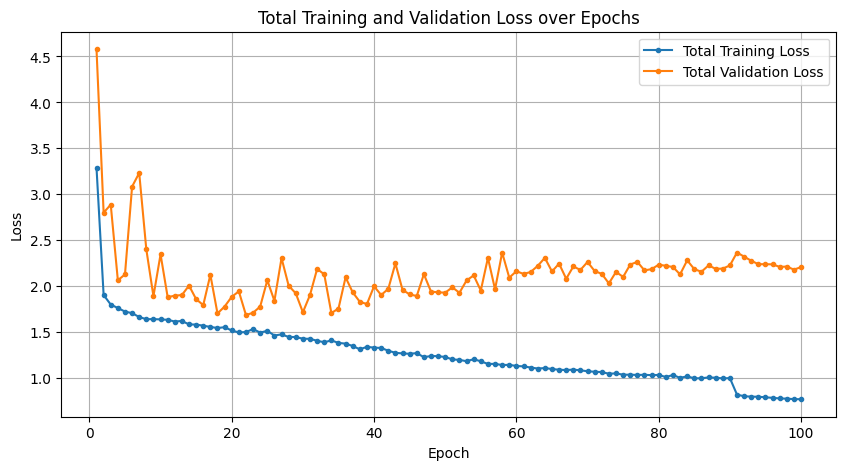

In [11]:
# prompt: make a graph of total_val_loss and total_train_loss

plt.figure(figsize=(10, 5))
plt.plot(data['epoch'], data['total_train_loss'], marker='.', label='Total Training Loss')
plt.plot(data['epoch'], data['total_val_loss'], marker='.', label='Total Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Total Training and Validation Loss over Epochs')
plt.legend()
plt.grid()
plt.show()